<a href="https://colab.research.google.com/github/EBUSYGIN/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
from ast import literal_eval

df = pd.read_csv('markup.csv')

In [ ]:


# Список всех возможных меток
all_labels = [
    "Вопрос решен",  # Обратите внимание: у вас в примере "Вопрос решен", а в списке "Вопрос решен" (разная буква 'о')
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Другое"
]

# Создаём колонки для каждой метки и заполняем 0
for label in all_labels:
    df[label] = 0

# Функция для обработки каждой строки
def process_sentiment(row):
    sentiment = row['sentiment']

    # Пытаемся распарсить JSON, если не получается - обрабатываем как строку
    try:
        # Пробуем literal_eval на случай, если это строковое представление словаря
        if isinstance(sentiment, str):
            try:
                data = literal_eval(sentiment)
                if isinstance(data, dict) and 'choices' in data:
                    labels = data['choices']
                else:
                    labels = [str(data)] if data else []
            except:
                labels = [sentiment]
        elif isinstance(sentiment, dict):
            labels = sentiment.get('choices', [])
        else:
            labels = [str(sentiment)]
    except:
        labels = [str(sentiment)]

    # Заполняем соответствующие колонки
    for label in labels:
        # Проверяем, есть ли метка в нашем списке (с учётом возможных опечаток)
        if label in all_labels:
            row[label] = 1
        else:
            # Дополнительная проверка для похожих меток
            for existing_label in all_labels:
                if label.lower() == existing_label.lower():
                    row[existing_label] = 1
                    break

    return row

# Применяем функцию к каждой строке
df = df.apply(process_sentiment, axis=1)

# Удаляем исходную колонку sentiment, если она больше не нужна
# df = df.drop('sentiment', axis=1)
df


,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Другое
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"":[""Понравилось выполнение заявки"",""В...",2025-05-09T13:12:44.065760Z,1,0,0,0,1,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"":[""Понравилось выполнение заявки"",""Д...",2025-05-09T10:57:27.209739Z,0,0,0,0,1,1
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"":[""Понравилось выполнение заявки"",""В...",2025-05-09T10:57:17.714712Z,1,0,0,0,1,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0,0,0,1,0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,1,0,0,0,0,0
2370,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"":[""Нравится скорость отработки заяво...",2025-05-10T22:18:47.955163Z,1,1,1,1,1,0
2371,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Другое,2025-05-10T22:18:57.318493Z,0,0,0,0,0,1
2372,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Другое,2025-05-10T22:19:02.362933Z,0,0,0,0,0,1


In [ ]:
df = df.drop(columns=[
    'annotation_id',
    'annotator',
    'comment',
    'created_at',
    'id',
    'lead_time',
    'sentiment',
    'updated_at'
])

df

,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Другое
0,5.0,1,0,0,0,1,0
1,5.0,0,0,0,0,1,1
2,5.0,1,0,0,0,1,0
3,5.0,0,0,0,1,0,0
4,5.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2369,5.0,1,0,0,0,0,0
2370,5.0,1,1,1,1,1,0
2371,5.0,0,0,0,0,0,1
2372,5.0,0,0,0,0,0,1


In [ ]:
df.describe()

,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Другое
count,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000
mean,4.954928,0.515586,0.054760,0.157961,0.242628,0.241365,0.115838
std,0.381945,0.499862,0.227559,0.364781,0.428763,0.428001,0.320098
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rating                                2374 non-null   float64
 1   Вопрос решен                          2374 non-null   int64  
 2   Нравится качество выполнения заявки   2374 non-null   int64  
 3   Нравится качество работы сотрудников  2374 non-null   int64  
 4   Нравится скорость отработки заявок    2374 non-null   int64  
 5   Понравилось выполнение заявки         2374 non-null   int64  
 6   Другое                                2374 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 130.0 KB


<ipython-input-18-dc6b6c786a16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')  # для категориальных рейтингов


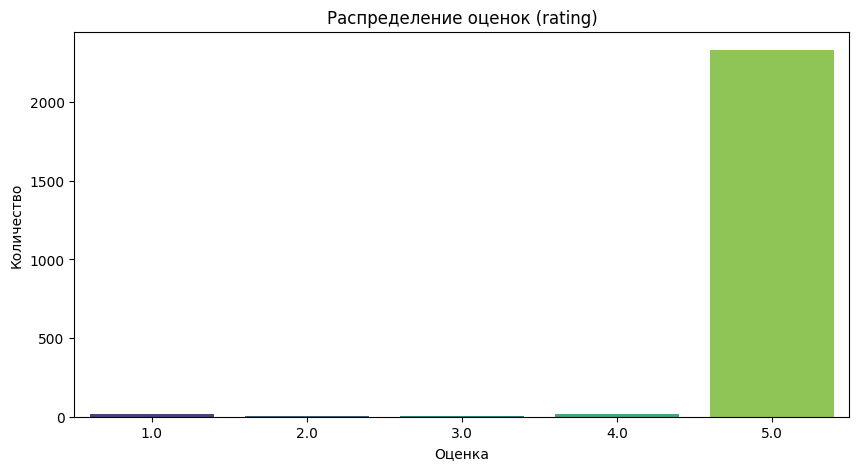

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', palette='viridis')  # для категориальных рейтингов
# или
# sns.histplot(data=df, x='rating', bins=5, kde=True)  # для числовых рейтингов
plt.title('Распределение оценок (rating)')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

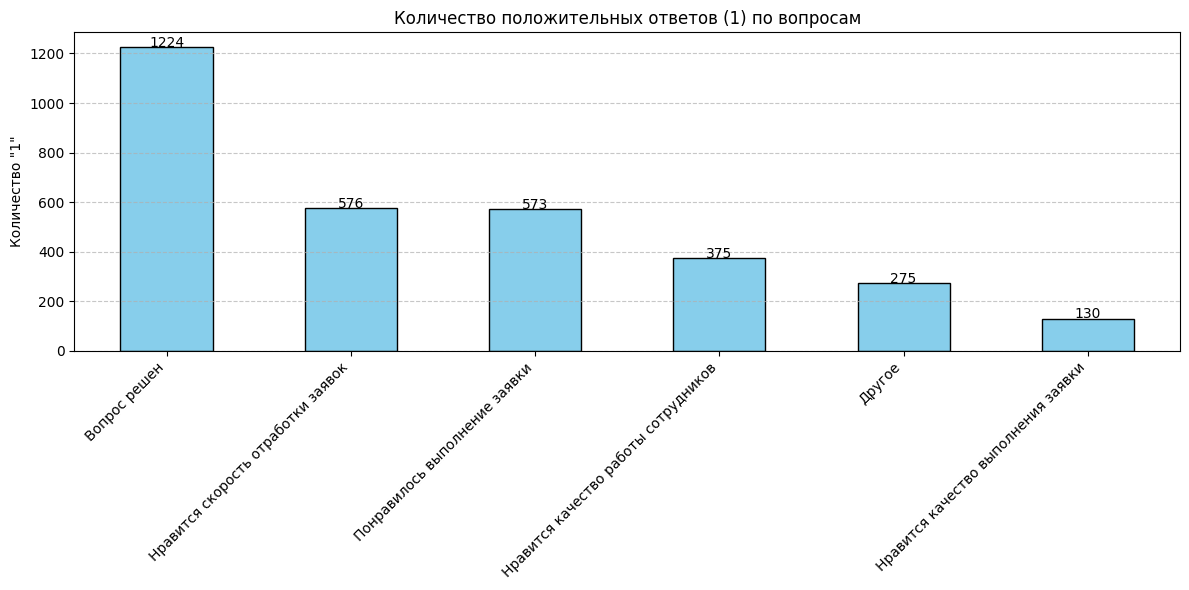

In [ ]:
binary_columns = [
    'Вопрос решен',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Нравится скорость отработки заявок',
    'Понравилось выполнение заявки',
    'Другое'
]

# Считаем сумму единиц (положительных ответов)
positive_counts = df[binary_columns].sum().sort_values(ascending=False)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
positive_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество положительных ответов (1) по вопросам')
plt.ylabel('Количество "1"')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for i, value in enumerate(positive_counts):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.tight_layout()
plt.show()

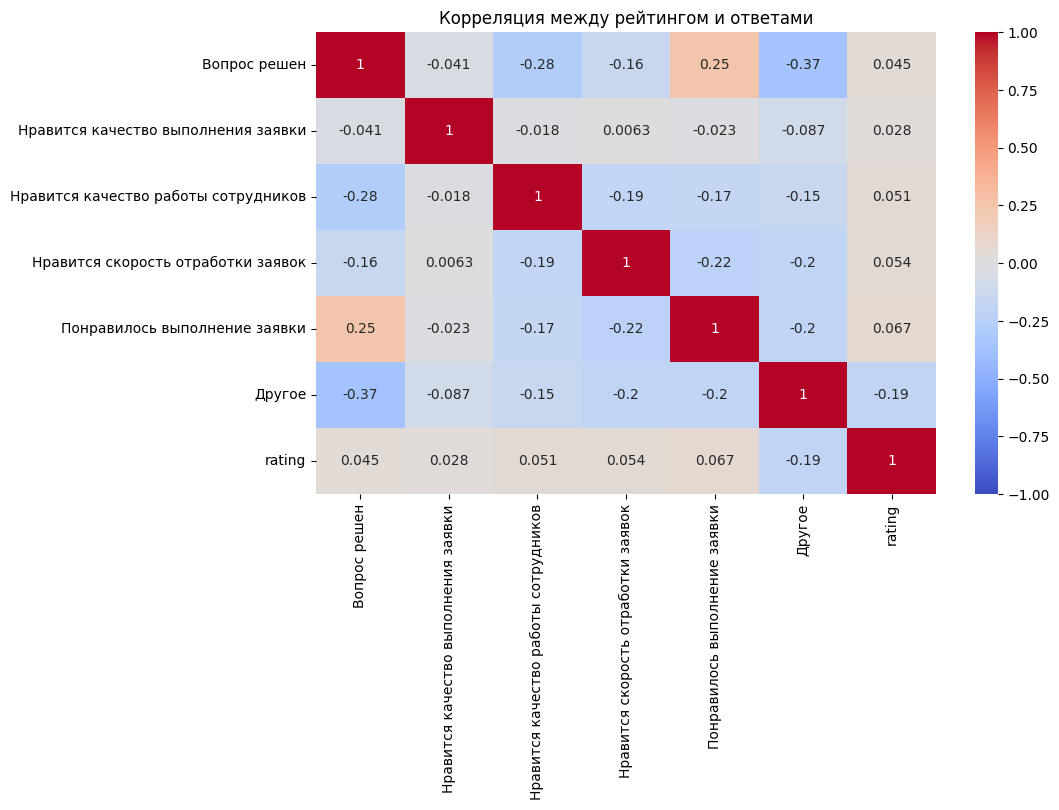

In [ ]:
# Добавляем rating в бинарные данные для корреляции
corr_data = df[binary_columns + ['rating']]

# Строим тепловую карту корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между рейтингом и ответами')
plt.show()

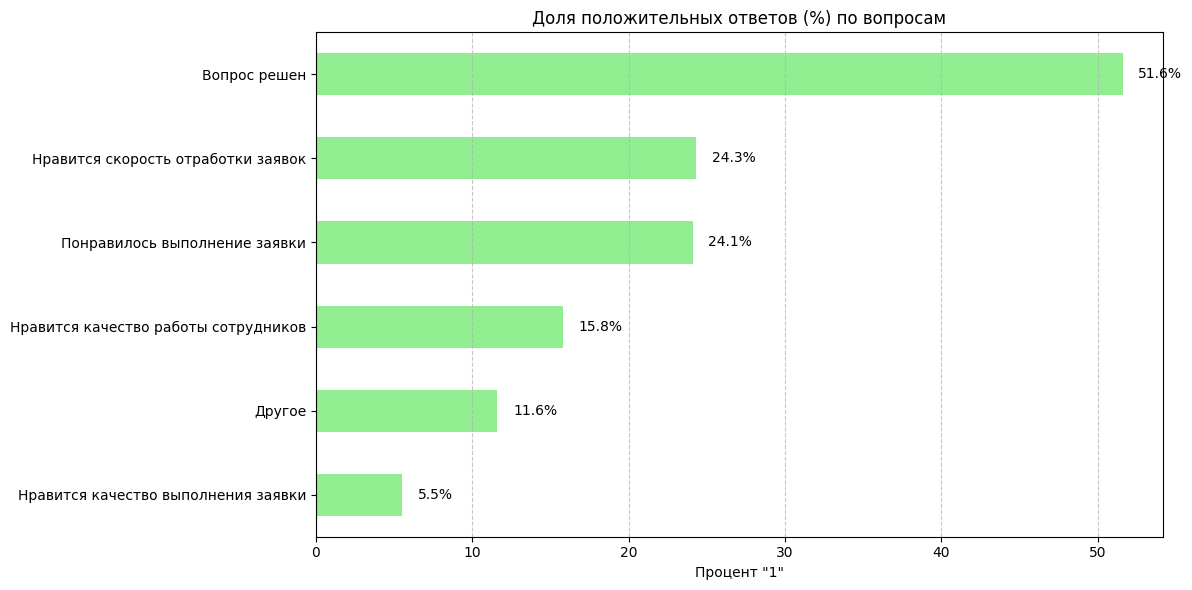

In [ ]:
# Подготовка данных: доля положительных ответов
percent_positive = (df[binary_columns].mean() * 100).round(1)

plt.figure(figsize=(12, 6))
percent_positive.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Доля положительных ответов (%) по вопросам')
plt.xlabel('Процент "1"')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи
for i, value in enumerate(percent_positive.sort_values()):
    plt.text(value + 1, i, f'{value}%', va='center')

plt.tight_layout()
plt.show()

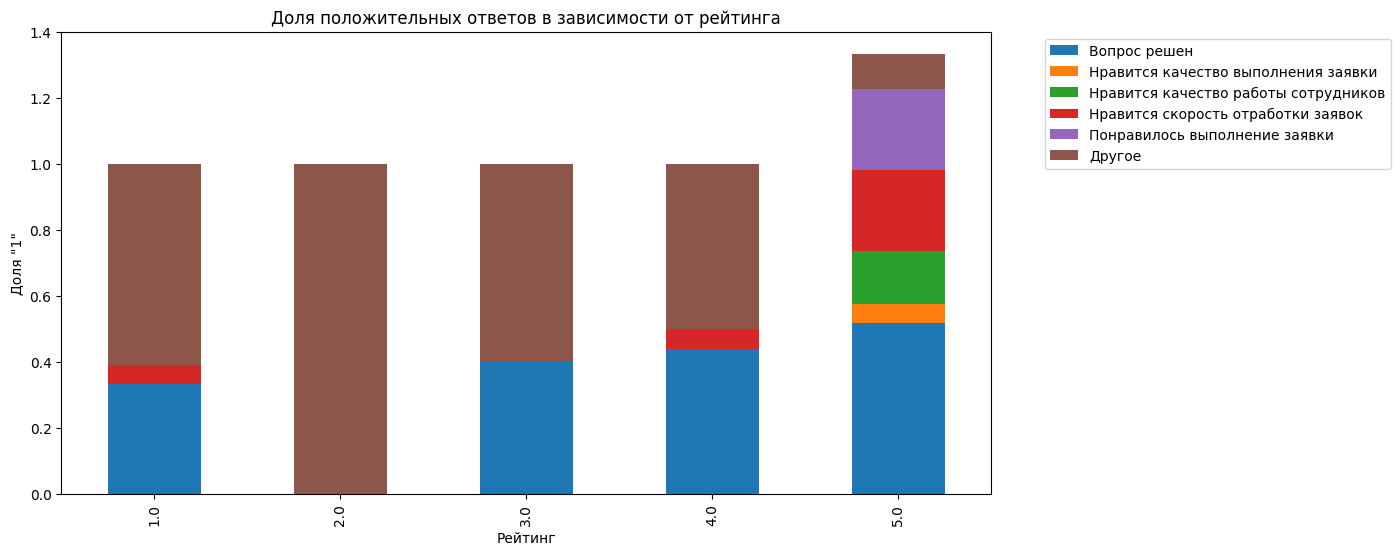

In [ ]:
# Группируем по рейтингу и считаем среднее
rating_stats = df.groupby('rating')[binary_columns].mean()

# Строим stacked bar plot
rating_stats.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Доля положительных ответов в зависимости от рейтинга')
plt.ylabel('Доля "1"')
plt.xlabel('Рейтинг')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()